In [14]:
#importing basics libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [15]:
train_df=pd.read_csv('train.csv')
train_df.head()

,ID,Place,location,date,status,job_title,summary,positives,negatives,advice_to_mgmt,score_1,score_2,score_3,score_4,score_5,score_6,overall
0,1,startup_1,NaN,"Dec 11, 2018",Current Employee,Anonymous Employee,Best Company to work for,People are smart and friendly,Bureaucracy is slowing things down,NaN,4.0,5.0,5.0,4.0,5.0,0,5.0
1,2,startup_1,"Mountain View, CA","Jun 21, 2013",Former Employee,Program Manager,"Moving at the speed of light, burn out is inev...","1) Food, food, food. 15+ cafes on main campus ...",1) Work/life balance. What balance? All those ...,1) Don't dismiss emotional intelligence and ad...,2.0,3.0,3.0,5.0,3.0,2094,5.0
2,3,startup_1,"New York, NY","May 10, 2014",Current Employee,Software Engineer III,Great balance between big-company security and...,"* If you're a software engineer, you're among ...","* It *is* becoming larger, and with it comes g...",Keep the focus on the user. Everything else wi...,5.0,4.0,5.0,5.0,4.0,949,5.0
3,4,startup_1,"Mountain View, CA","Feb 8, 2015",Current Employee,Anonymous Employee,The best place I've worked and also the most d...,You can't find a more well-regarded company th...,I live in SF so the commute can take between 1...,Keep on NOT micromanaging - that is a huge ben...,2.0,5.0,5.0,4.0,5.0,498,4.0
4,10,startup_1,NaN,"Dec 9, 2018",Current Employee,Anonymous Employee,Execellent for engineers,Impact driven. Best tech in the world.,Size matters. Engineers are a bit disconnected...,NaN,5.0,5.0,5.0,5.0,5.0,0,4.0


In [16]:
test_df=pd.read_csv('test.csv')
test_df.head()

,ID,Place,location,date,status,job_title,summary,positives,negatives,advice_to_mgmt,score_1,score_2,score_3,score_4,score_5,score_6
0,5,startup_1,"Los Angeles, CA","Jul 19, 2018",Former Employee,Software Engineer,"Unique, one of a kind dream job",Google is a world of its own. At every other c...,"If you don't work in MTV (HQ), you will be giv...",Promote managers into management for their man...,5,5,5,5,5,49
1,6,startup_1,"Mountain View, CA","Dec 9, 2018",Former Employee,SDE2,NICE working in GOOGLE as an INTERN,"People are not that busy, so they are nice to ...",Food is not good as I expected. People said it...,NaN,4,4,4,5,4,1
2,7,startup_1,"New York, NY","Dec 11, 2018",Current Employee,Software Engineer,Software engineer,Great working environment. Good work life balance,Usual big company problems. Hierarchy.,NaN,5,4,4,5,4,0
3,8,startup_1,NaN,"Dec 11, 2018",Former Employee,Anonymous Employee,great place to work and progress,"work culture, benefits, growth, people,",No cons that i can think of,NaN,5,5,5,5,5,0
4,9,startup_1,"New York, NY","Dec 10, 2018",Current Employee,Anonymous Employee,Google Surpasses Realistic Expectations,Great products. Vision you can feel good about...,Younger employees complaining about the compan...,NaN,5,5,5,5,5,0


# Train

In [17]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30336 entries, 0 to 30335
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ID              30336 non-null  int64  
 1   Place           30336 non-null  object 
 2   location        19082 non-null  object 
 3   date            30336 non-null  object 
 4   status          30336 non-null  object 
 5   job_title       30336 non-null  object 
 6   summary         30284 non-null  object 
 7   positives       30336 non-null  object 
 8   negatives       30336 non-null  object 
 9   advice_to_mgmt  17059 non-null  object 
 10  score_1         27150 non-null  float64
 11  score_2         24286 non-null  float64
 12  score_3         27167 non-null  float64
 13  score_4         27145 non-null  float64
 14  score_5         26851 non-null  float64
 15  score_6         30336 non-null  int64  
 16  overall         30336 non-null  float64
dtypes: float64(6), int64(2), object

# Missing Values

In [18]:
train_df.isna().sum()

ID                    0
Place                 0
location          11254
date                  0
status                0
job_title             0
summary              52
positives             0
negatives             0
advice_to_mgmt    13277
score_1            3186
score_2            6050
score_3            3169
score_4            3191
score_5            3485
score_6               0
overall               0
dtype: int64

In [19]:
for i in train_df[['score_1','score_2','score_3','score_4','score_5','location','summary']]:
    train_df[i]=train_df[i].fillna(train_df[i].mode()[0])  

In [20]:
train_df.isna().sum()

ID                    0
Place                 0
location              0
date                  0
status                0
job_title             0
summary               0
positives             0
negatives             0
advice_to_mgmt    13277
score_1               0
score_2               0
score_3               0
score_4               0
score_5               0
score_6               0
overall               0
dtype: int64

In [21]:
train_df['Place'].value_counts()##onehot

startup_4    11758
startup_6     8172
startup_2     5863
startup_1     3468
startup_5      698
startup_3      377
Name: Place, dtype: int64

In [22]:
train_df['location'].value_counts()#label

Redmond, WA                 13740
Seattle, WA                  2220
Hyderabad (India)             953
Mountain View, CA             750
Bengaluru (India)             744
                            ...  
Oro Valley, AZ                  1
Copperton, UT                   1
Madison, TN                     1
Minden, NV                      1
Pudong, Shanghai (China)        1
Name: location, Length: 1371, dtype: int64

In [23]:
train_df['date'].value_counts()#label

 Sep 19, 2017    110
 Jun 11, 2008     52
 May 22, 2017     49
 Aug 29, 2018     46
 Sep 18, 2017     46
                ... 
 Feb 5, 2013       1
 Feb 21, 2013      1
 Jun 22, 2013      1
 Jun 27, 2009      1
 Dec 16, 2010      1
Name: date, Length: 3508, dtype: int64

In [24]:
train_df['status'].value_counts()#onehot

Current Employee     19087
Former Employee      11249
Name: status, dtype: int64

In [25]:
train_df['job_title'].value_counts()#label

 Anonymous Employee               12079
 Software Engineer                  825
 Software Development Engineer      583
 Specialist                         480
 Program Manager                    378
                                  ...  
 Commnunities Supervisor              1
 Vice President Hardlines             1
 Control Buyer                        1
 Non Developer                        1
 Senior Project Managet               1
Name: job_title, Length: 3920, dtype: int64

ID,positives, negatives, advice to mgmt, summary - drop it

In [26]:
train_df.columns

Index(['ID', 'Place', 'location', 'date', 'status', 'job_title', 'summary',
       'positives', 'negatives', 'advice_to_mgmt', 'score_1', 'score_2',
       'score_3', 'score_4', 'score_5', 'score_6', 'overall'],
      dtype='object')

In [27]:
train_df.drop(['ID','positives','negatives','advice_to_mgmt','summary'],axis=1, inplace=True)

# Outliers-:

In [28]:
data1=train_df.select_dtypes(include=['int','float'])

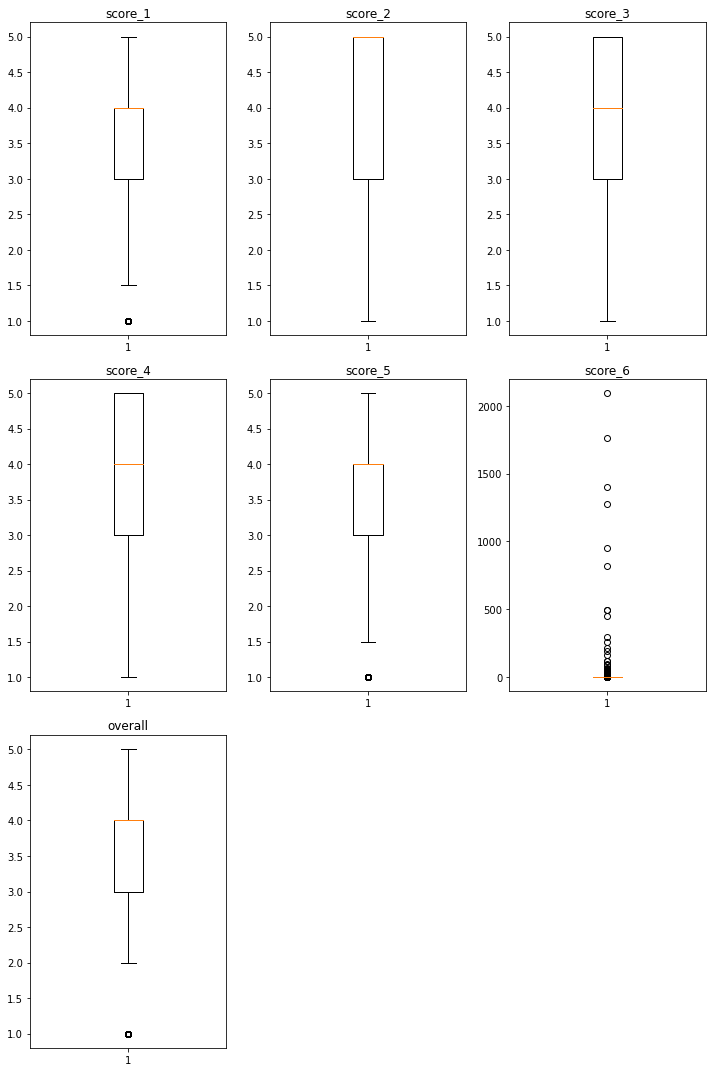

In [29]:
#check for outliers
plt.figure(figsize=(10,15))
for i,feature in enumerate(data1.columns):
    plt.subplot(3,3,i+1)
    plt.boxplot(data1[feature])
    plt.title(feature)
    plt.tight_layout()
plt.show()

In [30]:
Q1 = np.percentile(train_df['score_6'], 25, interpolation='midpoint')
Q2 = np.percentile(train_df['score_6'], 50, interpolation='midpoint')
Q3 = np.percentile(train_df['score_6'], 75, interpolation='midpoint')

#find the interquartile range
IQR = Q3-Q1

#find upper limit and lower limit
low_limit = Q1-1.5*IQR
up_limit = Q3+1.5*IQR

print('Lower limit is :',low_limit)
print('Upper limit is :',up_limit)

Lower limit is : -1.5
Upper limit is : 2.5


In [31]:
#capping/flooring method
train_df['score_6'] = np.where(train_df['score_6']<low_limit,low_limit,np.where(train_df['score_6']>up_limit,up_limit,train_df['score_6']))

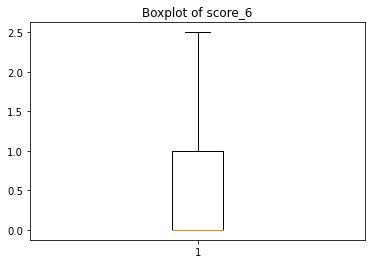

In [32]:
plt.boxplot(train_df['score_6'])
plt.title('Boxplot of score_6')
plt.show()

## Encoding-:

In [33]:
#one hot encoding
encoded=pd.get_dummies(train_df[['Place','status']])

#concat data frames data and data1
train_df=pd.concat([train_df,encoded], axis=1)
train_df=train_df.drop(['Place','status'],axis=1)

In [34]:
train_df.head()

,location,date,job_title,score_1,score_2,score_3,score_4,score_5,score_6,overall,Place_startup_1,Place_startup_2,Place_startup_3,Place_startup_4,Place_startup_5,Place_startup_6,status_Current Employee,status_Former Employee
0,"Redmond, WA","Dec 11, 2018",Anonymous Employee,4.0,5.0,5.0,4.0,5.0,0.0,5.0,1,0,0,0,0,0,1,0
1,"Mountain View, CA","Jun 21, 2013",Program Manager,2.0,3.0,3.0,5.0,3.0,2.5,5.0,1,0,0,0,0,0,0,1
2,"New York, NY","May 10, 2014",Software Engineer III,5.0,4.0,5.0,5.0,4.0,2.5,5.0,1,0,0,0,0,0,1,0
3,"Mountain View, CA","Feb 8, 2015",Anonymous Employee,2.0,5.0,5.0,4.0,5.0,2.5,4.0,1,0,0,0,0,0,1,0
4,"Redmond, WA","Dec 9, 2018",Anonymous Employee,5.0,5.0,5.0,5.0,5.0,0.0,4.0,1,0,0,0,0,0,1,0


In [35]:
#label encoding
from sklearn.preprocessing import LabelEncoder
label_en=LabelEncoder()
for i in train_df[['location', 'date', 'job_title']]:
    train_df[i]=label_en.fit_transform(train_df[i])

In [36]:
train_df.head()

,location,date,job_title,score_1,score_2,score_3,score_4,score_5,score_6,overall,Place_startup_1,Place_startup_2,Place_startup_3,Place_startup_4,Place_startup_5,Place_startup_6,status_Current Employee,status_Former Employee
0,1013,635,181,4.0,5.0,5.0,4.0,5.0,0.0,5.0,1,0,0,0,0,0,1,0
1,815,1849,2347,2.0,3.0,3.0,5.0,3.0,2.5,5.0,1,0,0,0,0,0,0,1
2,849,2308,3289,5.0,4.0,5.0,5.0,4.0,2.5,5.0,1,0,0,0,0,0,1,0
3,815,1120,181,2.0,5.0,5.0,4.0,5.0,2.5,4.0,1,0,0,0,0,0,1,0
4,1013,881,181,5.0,5.0,5.0,5.0,5.0,0.0,4.0,1,0,0,0,0,0,1,0


# Test-:

In [37]:
test_df.isna().sum()

ID                    0
Place                 0
location           9625
date                  0
status                0
job_title             0
summary              51
positives             0
negatives             1
advice_to_mgmt    12519
score_1               0
score_2               0
score_3               0
score_4               0
score_5               0
score_6               0
dtype: int64

In [38]:
#fill missing values in the location column
test_df['location']=test_df['location'].fillna(test_df['location'].mode()[0])

In [39]:
test_df.isna().sum()

ID                    0
Place                 0
location              0
date                  0
status                0
job_title             0
summary              51
positives             0
negatives             1
advice_to_mgmt    12519
score_1               0
score_2               0
score_3               0
score_4               0
score_5               0
score_6               0
dtype: int64

In [40]:
test1=test_df

In [41]:
#one hot encoding
encoded=pd.get_dummies(test1[['Place','status']])

#concat data frames data and data1
test1=pd.concat([test1,encoded], axis=1)
test1=test1.drop(['Place','status'],axis=1)

In [42]:
#label encoding
from sklearn.preprocessing import LabelEncoder
label_en=LabelEncoder()
for i in test1[['location', 'date', 'job_title']]:
    test1[i]=label_en.fit_transform(test1[i])

In [43]:
test1.drop(['ID','positives','negatives','advice_to_mgmt','summary'],axis=1, inplace=True)

In [44]:
test1.head()

,location,date,job_title,score_1,score_2,score_3,score_4,score_5,score_6,Place_startup_1,Place_startup_2,Place_startup_3,Place_startup_4,Place_startup_5,Place_startup_6,status_Current Employee,status_Former Employee
0,738,1025,3447,5,5,5,5,5,49,1,0,0,0,0,0,0,1
1,844,592,2748,4,4,4,5,4,1,1,0,0,0,0,0,0,1
2,878,417,3447,5,4,4,5,4,0,1,0,0,0,0,0,1,0
3,1140,417,180,5,5,5,5,5,0,1,0,0,0,0,0,0,1
4,878,410,180,5,5,5,5,5,0,1,0,0,0,0,0,1,0


# Modeling

In [55]:
#split the data
y = train_df['overall']
x = train_df.drop('overall', axis=1)

#split it into train and test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, random_state=42, test_size=0.3)

In [63]:
#gradient boosting
from sklearn.ensemble import GradientBoostingClassifier
gbr=GradientBoostingClassifier(n_estimators=91,max_depth=5, min_samples_split=2,random_state=32)
gbr.fit(x_train,y_train)
y_predict=gbr.predict(x_test)

In [64]:
#check the performance of the model
from sklearn.metrics import f1_score
print('f1 Score is :', f1_score(y_test,y_predict, average='micro'))

f1 Score is : 0.4211625096143281


In [65]:
y_predict = gbr.predict(test1)

In [66]:
y_predict

array([5., 4., 4., ..., 3., 2., 4.])

In [67]:
test_df['overall']=y_predict

In [68]:
test_df.head()

,ID,Place,location,date,status,job_title,summary,positives,negatives,advice_to_mgmt,score_1,score_2,score_3,score_4,score_5,score_6,overall
0,5,startup_1,"Los Angeles, CA","Jul 19, 2018",Former Employee,Software Engineer,"Unique, one of a kind dream job",Google is a world of its own. At every other c...,"If you don't work in MTV (HQ), you will be giv...",Promote managers into management for their man...,5,5,5,5,5,49,5.0
1,6,startup_1,"Mountain View, CA","Dec 9, 2018",Former Employee,SDE2,NICE working in GOOGLE as an INTERN,"People are not that busy, so they are nice to ...",Food is not good as I expected. People said it...,NaN,4,4,4,5,4,1,4.0
2,7,startup_1,"New York, NY","Dec 11, 2018",Current Employee,Software Engineer,Software engineer,Great working environment. Good work life balance,Usual big company problems. Hierarchy.,NaN,5,4,4,5,4,0,4.0
3,8,startup_1,"Seattle, WA","Dec 11, 2018",Former Employee,Anonymous Employee,great place to work and progress,"work culture, benefits, growth, people,",No cons that i can think of,NaN,5,5,5,5,5,0,5.0
4,9,startup_1,"New York, NY","Dec 10, 2018",Current Employee,Anonymous Employee,Google Surpasses Realistic Expectations,Great products. Vision you can feel good about...,Younger employees complaining about the compan...,NaN,5,5,5,5,5,0,5.0


In [69]:
sample=test_df[['ID','overall']]

In [70]:
sample

,ID,overall
0,5,5.0
1,6,4.0
2,7,4.0
3,8,5.0
4,9,5.0
...,...,...
29267,66959,4.0
29268,66965,3.0
29269,66968,3.0
29270,66978,2.0


In [71]:
sample.to_csv('sample_submission.csv',index=False)